<a href="https://colab.research.google.com/github/mariophobia/python-basics/blob/main/projekt_zaliczeniowy_maria_zukowska_grupa1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
import matplotlib.pyplot as plt
import urllib.request

CSV_PATH = "dane6.csv"
df = pd.read_csv(CSV_PATH)
df.head()

,coordinates,created_at,hashtags,media,urls,favorite_count,id,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_user_id,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_screen_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,NaN,Thu Aug 05 13:43:09 +0000 2021,NaN,NaN,NaN,1,1423278406167187458,tomo9000p,1.423265e+18,9.188923e+17,...,430,494,8,NaN,roboter,roboter15,5890,NaN,NaN,False
1,NaN,Thu Aug 05 12:12:01 +0000 2021,NaN,NaN,NaN,0,1423255469389406209,NaN,NaN,NaN,...,938,1335,10,NaN,WIKI WEST,west_wiki,122724,NaN,NaN,False
2,NaN,Thu Aug 05 13:51:38 +0000 2021,NaN,NaN,NaN,0,1423280539981602821,lukasz_nd,1.423278e+18,9.211491e+17,...,2544,1307,10,NaN,Karol Kaźmierczak,KKazmierczakK,20863,NaN,https://www.facebook.com/pages/Karol-Ka%C5%BAmierczak/249144695233021,False
3,NaN,Thu Aug 05 16:27:30 +0000 2021,NaN,NaN,NaN,0,1423319766320697345,NaN,NaN,NaN,...,617,954,1,Wielka Polska,Przemysław Świrta 🇵🇱🤝🇭🇺,primoszprawy,6612,NaN,https://konfederacja.pl/po-stronie-polski/,False
4,NaN,Thu Aug 05 11:21:15 +0000 2021,NaN,NaN,NaN,0,1423242694114091008,NaN,NaN,NaN,...,3093,5002,7,Polska,stefan wilczyński,stefanwilczysk1,125379,NaN,NaN,False


In [ ]:
#1
dni_tygodnia = {
 "Mon": "poniedziałek",
 "Tue": "wtorek",
 "Wed": "środa",
 "Thu": "czwartek",
 "Fri": "piątek",
 "Sat": "sobota",
 "Sun": "niedziela"
}
dni_po_polsku = []
for data in df["created_at"]:
 if pd.isna(data):
   dni_po_polsku.append(None)
 else:
    skrot = str(data).split()[0]
    dni_po_polsku.append(dni_tygodnia[skrot])
df["created_at_dzien_pl"] = dni_po_polsku

df[["created_at", "created_at_dzien_pl"]].head()


,created_at,created_at_dzien_pl
0,Thu Aug 05 13:43:09 +0000 2021,czwartek
1,Thu Aug 05 12:12:01 +0000 2021,czwartek
2,Thu Aug 05 13:51:38 +0000 2021,czwartek
3,Thu Aug 05 16:27:30 +0000 2021,czwartek
4,Thu Aug 05 11:21:15 +0000 2021,czwartek


In [ ]:
#2
miesiace = {
  "Jan": "01",
  "Feb": "02",
  "Mar": "03",
  "Apr": "04",
  "May": "05",
  "Jun": "06",
  "Jul": "07",
  "Aug": "08",
  "Sep": "09",
  "Oct": "10",
  "Nov": "11",
  "Dec": "12"
}

miesiace_num = []

for data in df["user_created_at"]:
    if pd.isna(data):
    miesiace_num.append(None)
    else:
       miesiac = str(data).split()[1]
      miesiace_num.append(miesiace[miesiac])

df["user_created_at_month_num"] = miesiace_num

df[["user_created_at", "user_created_at_month_num"]].head()


In [ ]:
#3
linki_tweetow = []

for i in range(len(df)):
    user = df.loc[i, "user_screen_name"]
    tweet_id = df.loc[i, "id"]

    if pd.isna(user) or pd.isna(tweet_id):
        continue

    link = "https://twitter.com/" + str(user) + "/status/" + str(tweet_id)
    linki_tweetow.append(link)

linki_tweetow[:10]


['https://twitter.com/roboter15/status/1423278406167187458',
 'https://twitter.com/west_wiki/status/1423255469389406209',
 'https://twitter.com/KKazmierczakK/status/1423280539981602821',
 'https://twitter.com/primoszprawy/status/1423319766320697345',
 'https://twitter.com/stefanwilczysk1/status/1423242694114091008',
 'https://twitter.com/Cukier77821679/status/1423252319706169346',
 'https://twitter.com/PWidzenia/status/1423281395112108040',
 'https://twitter.com/andrzej75_/status/1423210383586873345',
 'https://twitter.com/lukasz_nd/status/1423254130559176710',
 'https://twitter.com/dobieslav/status/1423227474368991232']

In [ ]:
#4
wszystkie_linki = []

for text in df["text"]:
    if pd.isna(text):
        continue

    slowa = text.split()
    for s in slowa:
        if s.startswith("http"):
            wszystkie_linki.append(s)

wszystkie_linki[:15]


['https://t.co/94pCePoMM2',
 'https://t.co/5gIzUUnpng',
 'https://t.co/MwANDOMRyR',
 'https://t.co/94pCePoMM2',
 'https://t.co/5gIzUUnpng',
 'https://t.co/3nvKoxoC18',
 'https://t.co/bs4GJJTYQX',
 'https://t.co/JD2fADIX0e',
 'https://t.co/eNVFKjLWMU',
 'https://t.co/94pCePoMM2',
 'https://t.co/5gIzUUnpng',
 'https://t.co/eLiPNIToN2',
 'https://t.co/HmWltHk8yS',
 'https://t.co/DhuZWBb5kE',
 'https://t.co/Y1RdaFbwcP']

In [ ]:
#5
linki_obrazkow = []

for link in wszystkie_linki:
    if ".jpg" in link or ".png" in link or ".jpeg" in link:
        linki_obrazkow.append(link)

linki_obrazkow[:10]


In [ ]:
#6 wczytanie stopwords
import urllib.request

url = "https://raw.githubusercontent.com/bieli/stopwords/master/polish.stopwords.txt"
tekst = urllib.request.urlopen(url).read().decode("utf-8")

stopwords = tekst.split()

print("Liczba stopwords:", len(stopwords))
stopwords[:20]



Liczba stopwords: 350


['a',
 'aby',
 'ach',
 'acz',
 'aczkolwiek',
 'aj',
 'albo',
 'ale',
 'alez',
 'ależ',
 'ani',
 'az',
 'aż',
 'bardziej',
 'bardzo',
 'beda',
 'bedzie',
 'bez',
 'deda',
 'będą']

In [ ]:
oczyszczone_teksty = []

for text in df["text"]:
    if pd.isna(text):
        oczyszczone_teksty.append("")
    else:
        slowa = text.lower().split()
        nowe_slowa = []

        for s in slowa:
            if s not in stopwords:
                nowe_slowa.append(s)

        oczyszczone_teksty.append(" ".join(nowe_slowa))

df["text_without_stopwords"] = oczyszczone_teksty

df[["text", "text_without_stopwords"]].head()


,text,text_without_stopwords
0,@tomo9000p @SilverMarketFan @ESPI_Operator @sylkarp @averageguy62 Rozmawialem ostatnio z kierowca robiacym w kurierce miedzy hubami. Ukraina potrafila przyjsc z kupionym prawkiem c+e.,@tomo9000p @silvermarketfan @espi_operator @sylkarp @averageguy62 rozmawialem ostatnio kierowca robiacym kurierce hubami. ukraina potrafila przyjsc kupionym prawkiem c+e.
1,"A więc jeśli się nie zaszczepimy, to wszyscy umrzemy wraz z IV falą, a kraje w których zaszczepiono, \n\nIndonezja 7,9% populacji, \nBośnia &gt;7%, \nTajlanda 5,7%, \nUkraina 4,8% \nEgipt &gt;1,8%...","zaszczepimy, umrzemy wraz iv falą, kraje zaszczepiono, indonezja 7,9% populacji, bośnia &gt;7%, tajlanda 5,7%, ukraina 4,8% egipt &gt;1,8%, afganistan &gt;0,6%, syria &gt;0,1%, znikną powierzchni ..."
2,"@lukasz_nd To są spekulacje wbrew faktom. Bo źródła mówią, że Waszyngton i Moskwa były przeciwne secesji Ukrainy, a Ukraina jednak secesji dokonała.","@lukasz_nd spekulacje wbrew faktom. źródła mówią, waszyngton moskwa przeciwne secesji ukrainy, ukraina secesji dokonała."
3,"A więc jeśli się nie zaszczepimy, to wszyscy umrzemy wraz z IV falą, a kraje w których zaszczepiono, \n\nIndonezja 7,9% populacji, \nBośnia &gt;7%, \nTajlanda 5,7%, \nUkraina 4,8% \nEgipt &gt;1,8%...","zaszczepimy, umrzemy wraz iv falą, kraje zaszczepiono, indonezja 7,9% populacji, bośnia &gt;7%, tajlanda 5,7%, ukraina 4,8% egipt &gt;1,8%, afganistan &gt;0,6%, syria &gt;0,1%, znikną powierzchni ..."
4,"A więc jeśli się nie zaszczepimy, to wszyscy umrzemy wraz z IV falą, a kraje w których zaszczepiono, \n\nIndonezja 7,9% populacji, \nBośnia &gt;7%, \nTajlanda 5,7%, \nUkraina 4,8% \nEgipt &gt;1,8%...","zaszczepimy, umrzemy wraz iv falą, kraje zaszczepiono, indonezja 7,9% populacji, bośnia &gt;7%, tajlanda 5,7%, ukraina 4,8% egipt &gt;1,8%, afganistan &gt;0,6%, syria &gt;0,1%, znikną powierzchni ..."


In [ ]:
#CZESC 2  1 sortowanie po liczbie polubien malejaco
top_likes = df.sort_values("favorite_count", ascending=False)

# top 5
top_likes[["favorite_count", "text"]].head(5)


,favorite_count,text
160,705,"A więc jeśli się nie zaszczepimy, to wszyscy umrzemy wraz z IV falą, a kraje w których zaszczepiono, \n\nIndonezja 7,9% populacji, \nBośnia &gt;7%, \nTajlanda 5,7%, \nUkraina 4,8% \nEgipt &gt;1,8%..."
137,383,"Wielki sukces polskiego sportu: p.Jan-Krzysztof Duda w półfinale Puharu Świata pokonał aktualnego Mistrza Świata, p.Magnusa Carsena (Norwegia) - i obecnie gra w finale przeciwko p.Sergiuszowi Karj..."
316,291,A mnie ciekawi @Straz_Graniczna jak można nielegalnie przekroczyć zieloną granicę pomiędzy Ukrainą i Polską w nienagannie czystych New Balance? https://t.co/94pCePoMM2 https://t.co/5gIzUUnpng
954,290,@kroplewina Ukraina robisz to dobrze. Zajebiste mają te nowe stroje i co najważniejsze na pewno będą się czuć w nich bardziej komfortowo ❤️
1296,201,"Niemcy najpierw wrzuciły Białoruś w ręce Putina, teraz to samo robią z Ukrainą. My zaś mamy być ich strefą wpływu. Konsekwentnie stoją na straży linii Curzona, a Putin uznał to za szansę na powrót..."


In [ ]:
#2 TOP 5 tweetow z najwieksza liczba retweetow
top_retweets = df.sort_values("retweet_count", ascending=False)
top_retweets[["retweet_count", "text"]].head(5)

,retweet_count,text
30,129,"A więc jeśli się nie zaszczepimy, to wszyscy umrzemy wraz z IV falą, a kraje w których zaszczepiono, \n\nIndonezja 7,9% populacji, \nBośnia &gt;7%, \nTajlanda 5,7%, \nUkraina 4,8% \nEgipt &gt;1,8%..."
31,129,"A więc jeśli się nie zaszczepimy, to wszyscy umrzemy wraz z IV falą, a kraje w których zaszczepiono, \n\nIndonezja 7,9% populacji, \nBośnia &gt;7%, \nTajlanda 5,7%, \nUkraina 4,8% \nEgipt &gt;1,8%..."
29,129,"A więc jeśli się nie zaszczepimy, to wszyscy umrzemy wraz z IV falą, a kraje w których zaszczepiono, \n\nIndonezja 7,9% populacji, \nBośnia &gt;7%, \nTajlanda 5,7%, \nUkraina 4,8% \nEgipt &gt;1,8%..."
25,129,"A więc jeśli się nie zaszczepimy, to wszyscy umrzemy wraz z IV falą, a kraje w których zaszczepiono, \n\nIndonezja 7,9% populacji, \nBośnia &gt;7%, \nTajlanda 5,7%, \nUkraina 4,8% \nEgipt &gt;1,8%..."
26,129,"A więc jeśli się nie zaszczepimy, to wszyscy umrzemy wraz z IV falą, a kraje w których zaszczepiono, \n\nIndonezja 7,9% populacji, \nBośnia &gt;7%, \nTajlanda 5,7%, \nUkraina 4,8% \nEgipt &gt;1,8%..."


In [ ]:
#4 najnowszy uzytkownik
daty_kont = []

for data in df["user_created_at"]:
    if pd.isna(data):
        daty_kont.append(None)
    else:
        daty_kont.append(pd.to_datetime(data))

df["user_created_at_dt"] = daty_kont

# najwcześniejsza data
najstarsza_data = df["user_created_at_dt"].min()
najstarsza_data


Timestamp('2008-04-23 13:12:25+0000', tz='UTC')

In [ ]:
# użytkownik z najstarszym kontem
najstarszy_user = df[df["user_created_at_dt"] == najstarsza_data]["user_id"].iloc[0]

# jego tweety
df[df["user_id"] == najstarszy_user][["user_created_at", "text"]].head(20)


,user_created_at,text
482,Wed Apr 23 13:12:25 +0000 2008,"Ukraińska policja bada przyczyny śmierci białoruskiego aktywisty Witala Szyszoua. Przekazano, że brane pod uwagę są dwie wersje. \n\nhttps://t.co/ITQRrBrgvR"
717,Wed Apr 23 13:12:25 +0000 2008,#PILNE | W parku w Kijowie znaleziono ciało białoruskiego aktywisty Witala Szyszoua - poinformowała ukraińska policja.\n\nhttps://t.co/SNWBlGFTlH https://t.co/1IrwjbedBp
1189,Wed Apr 23 13:12:25 +0000 2008,Nowe ustalenia śledczych po katastrofie na zachodzie Ukrainy.\n\nhttps://t.co/Y1xaCtjt60


In [ ]:
#5 maksymalna liczba followersów
max_followers = df["user_followers_count"].max()
max_followers


In [ ]:
user_max_follow = df[df["user_followers_count"] == max_followers]["user_id"].iloc[0]

df[df["user_id"] == user_max_follow][["user_followers_count", "text"]].head(20)


In [ ]:
#6 zweryfikowani uzytkownicy
zweryfikowani = df[df["user_verified"] == True]
zweryfikowani[["user_verified", "text"]].head(20)


In [ ]:
#7 dzien tygodnia w ktory publikowano najwiecej tweetow
licznik_dni = {}

for dzien in df["created_at_dzien_pl"]:
    if dzien in licznik_dni:
        licznik_dni[dzien] += 1
    else:
        licznik_dni[dzien] = 1

licznik_dni


{'czwartek': 376,
 'środa': 302,
 'wtorek': 288,
 'poniedziałek': 92,
 'niedziela': 88,
 'sobota': 114,
 'piątek': 136}

In [ ]:
najczestszy_dzien = max(licznik_dni, key=licznik_dni.get)
najczestszy_dzien


'czwartek'

In [ ]:
#CZESC 3
liczba_tweetow = {}

for dzien in df["created_at_dzien_pl"]:
    if dzien in liczba_tweetow:
        liczba_tweetow[dzien] += 1
    else:
        liczba_tweetow[dzien] = 1

liczba_tweetow


{'czwartek': 376,
 'środa': 302,
 'wtorek': 288,
 'poniedziałek': 92,
 'niedziela': 88,
 'sobota': 114,
 'piątek': 136}

In [ ]:
dni = list(liczba_tweetow.keys())
wartosci = list(liczba_tweetow.values())

dni


['czwartek',
 'środa',
 'wtorek',
 'poniedziałek',
 'niedziela',
 'sobota',
 'piątek']

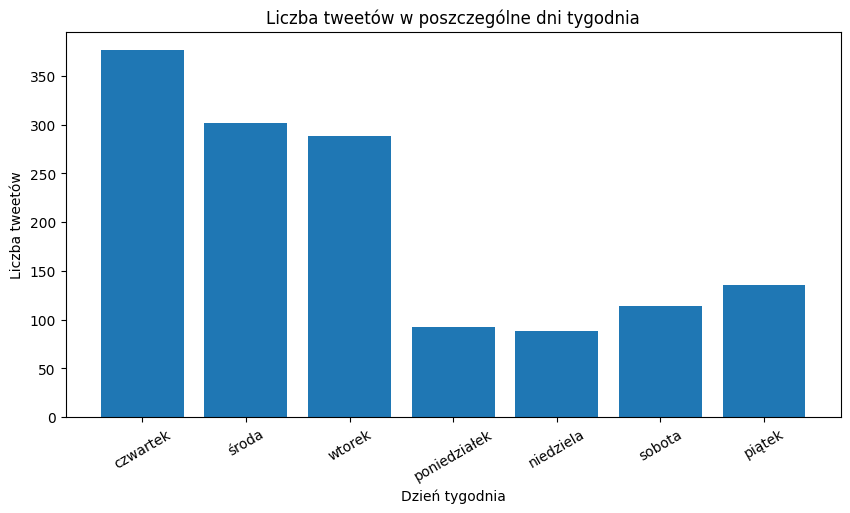

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(dni, wartosci)
plt.xlabel("Dzień tygodnia")
plt.ylabel("Liczba tweetów")
plt.title("Liczba tweetów w poszczególne dni tygodnia")
plt.xticks(rotation=30)
plt.show()
